In [77]:
%reset -f

 72%|█████████████████████████████████████████████████▊                   | 1301/1800 [33:20<12:47,  1.54s/it]


In [78]:
%connect_info

{
  "shell_port": 41347,
  "iopub_port": 44979,
  "stdin_port": 40803,
  "control_port": 58255,
  "hb_port": 54515,
  "ip": "127.0.0.1",
  "key": "ec758349-be9c0fa568d016cc089161f0",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d64e4127-2b5d-4e4c-bfc8-37b9924bd18d.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [79]:
### check the status of the port
# sudo ls -la /dev/ 
### must be 666=rw all
# !groups trix_arch
### must be group tty

In [80]:
### Use in terminal
# sudo chmod 666 /dev/ttyACM0
### or RUN here
# !xfce4-terminal -e "sudo chmod 666 /dev/ttyACM0 "

In [81]:
##### Try this if previos cell does not work
###-----------------------
### Use in terminal
# sudo usermod -a -G tty $USER
### or RUN here
# !xfce4-terminal -e "sudo usermod -a -G tty $USER"

In [82]:
#######################################################
#######################################################

# Reading is done from arduino Uno via post ttyACMO
# The reading frequecny is 5Hz (200ms)
# the 1st 7/10 samples should be thruwn away 
# bcoz of bad data format

# for each reading change:
#     dir_2_save = "run0/"
#     label = "sampleX"
#     add_label = "1"
#     env_condition = "room"
#     N_of_readings = 10 #=2sec

#######################################################
#######################################################

In [83]:
import serial
from datetime import datetime
import time
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
dir_2_save = "run2_tests/"

In [85]:
label = "samplaX"
add_label = "1"
env_condition = "room"
N_of_readings = 50 #5Hz=200ms : 10 -> 2sec


# label = "orange"
# add_label = "1"
# env_condition = "room_D"
# N_of_readings = 1800 #30min 1Hz

In [86]:
path_base = "/home/trix_arch/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project/Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/"
pathW = path_base + dir_2_save
os.chdir(pathW)
os.getcwd()

'/home/igor_trix/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project/Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/run2_tests'

In [87]:
serial_port = '/dev/ttyACM0'
baud_rate = 9600


pbar = tqdm(total=N_of_readings)
GGS_list = []
init_time = round(time.time(),3)*1000


    
with serial.Serial(serial_port, baud_rate) as ser:
    for cc1 in tqdm(range(10)):
        line_z = ser.readline();
        line_dec_z = line_z.decode("utf-8")
        
    while len(GGS_list) < N_of_readings:
#         time.sleep(1)
        line = ser.readline();
        line_dec = line.decode("utf-8") #ser.readline returns a binary, convert to string
        lst0 = line_dec.split(",")
        lst1 = [int(x) for x in lst0]
        if len(lst1)==6:
            GGS_list += [[int(round(time.time(),3)*1000-init_time)] + lst1]
            pbar.update(1)
#             print(line_dec);

 74%|███████████████████████████████████████████████████▎                 | 1337/1800 [22:32<07:44,  1.00s/it]

ValueError: invalid literal for int() with base 10: ''

In [88]:
GGS_list

[[1012, 352, 210, 411, 198, 30, 34],
 [2014, 351, 210, 411, 198, 30, 34],
 [3019, 350, 210, 410, 199, 30, 34],
 [4023, 345, 207, 408, 195, 30, 35],
 [5026, 344, 207, 408, 195, 30, 35],
 [6029, 343, 206, 408, 196, 30, 35],
 [7033, 343, 205, 407, 195, 30, 35],
 [8037, 342, 205, 407, 195, 30, 35],
 [9040, 342, 205, 407, 195, 30, 37],
 [10044, 340, 205, 406, 196, 30, 37],
 [11048, 340, 204, 407, 195, 30, 37],
 [12052, 339, 204, 405, 194, 30, 37],
 [13056, 339, 204, 406, 193, 30, 37],
 [14060, 338, 203, 405, 194, 30, 38],
 [15064, 337, 203, 405, 194, 30, 38],
 [16068, 336, 203, 404, 193, 30, 38],
 [17071, 335, 202, 403, 193, 30, 38],
 [18076, 334, 202, 402, 192, 30, 38],
 [19079, 334, 201, 402, 192, 30, 38],
 [20083, 333, 201, 403, 190, 30, 38],
 [21087, 332, 201, 403, 191, 30, 38],
 [22090, 332, 201, 403, 190, 30, 38],
 [23094, 332, 200, 403, 192, 30, 38],
 [24098, 331, 200, 403, 191, 30, 38],
 [25102, 330, 200, 402, 193, 30, 38],
 [26105, 330, 199, 402, 193, 30, 38],
 [27109, 329, 199, 40

In [ ]:
GGS_list[1087][1] = 434
GGS_list[1087]

In [89]:
GGS_df = pd.DataFrame(GGS_list, columns=["time_ms", "B102NO2", "B302C2H5OH", "B502VOC", "B702CO", "TdegC", "RH"])


In [90]:
filename_to_save = "./%s_%s_%s_%s.csv" % (label, add_label, env_condition, datetime.now().strftime("%Y%m%d_%H%M%S"))

with open(filename_to_save, 'w') as output_file:
    GGS_df.to_csv(output_file, index=False)
    print("Saved to file: " + filename_to_save)
    print("Under the path: " + pathW)

Saved to file: ./orange_1_room_D_20211220_144948.csv
Under the path: /home/trix_arch/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project/Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/run2_tests/


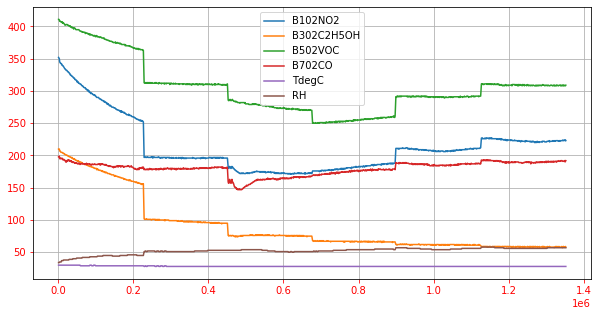

In [91]:
plt.figure(figsize=(10,5))
plt.plot(GGS_df.time_ms, GGS_df.drop('time_ms', axis=1))
plt.legend(GGS_df.drop('time_ms', axis=1).columns.to_list())
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid()

In [ ]:
GGS_df